# Analyse du PIB : Croissance vs Valeur Actuelle

Ce notebook analyse la relation entre les taux de croissance du PIB et les valeurs actuelles du PIB pour différents pays et périodes.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style pour de meilleures visualisations
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_palette("husl")

# Lecture des données fusionnées du PIB
df = pd.read_csv("../data/gdp_data.csv")

# Affichage des informations de base sur le dataset
print("Informations sur le dataset:")
print(df.info())

print("\nPremières lignes:")
display(df.head())

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1937 non-null   object 
 1   Country Code                  1937 non-null   object 
 2   Year                          1937 non-null   int64  
 3   Indicator Name (Growth)       1937 non-null   object 
 4   Indicator Code (Growth)       1937 non-null   object 
 5   GDP Growth (%)                1937 non-null   float64
 6   Indicator Name (Current US$)  1937 non-null   object 
 7   Indicator Code (Current US$)  1937 non-null   object 
 8   GDP (Current US$)             1937 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 136.3+ KB
None

Premières lignes:


,Country,Country Code,Year,Indicator Name (Growth),Indicator Code (Growth),GDP Growth (%),Indicator Name (Current US$),Indicator Code (Current US$),GDP (Current US$)
0,Africa Eastern and Southern,ZH,2020,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-2.864293,GDP (current US$),NY.GDP.MKTP.CD,9.333918e+11
1,Africa Eastern and Southern,ZH,2019,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.194319,GDP (current US$),NY.GDP.MKTP.CD,1.009721e+12
2,Africa Eastern and Southern,ZH,2018,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.666632,GDP (current US$),NY.GDP.MKTP.CD,1.012306e+12
3,Africa Eastern and Southern,ZH,2017,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.684543,GDP (current US$),NY.GDP.MKTP.CD,9.729989e+11
4,Africa Eastern and Southern,ZH,2016,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.194761,GDP (current US$),NY.GDP.MKTP.CD,8.289428e+11


## Nettoyage et Préparation des Données

Nous allons examiner les valeurs manquantes et les statistiques de base pour mieux comprendre notre jeu de données.

In [5]:
# Vérification des valeurs manquantes
print("Valeurs manquantes:")
print(df.isnull().sum())

# Statistiques de base
print("\nStatistiques descriptives:")
display(df.describe())

# Top 10 des pays par PIB moyen (US$ courants)
top_10_gdp = df.groupby('Country')['GDP (Current US$)'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 des pays par PIB moyen:")
display(top_10_gdp)

Valeurs manquantes:
Country                         0
Country Code                    0
Year                            0
Indicator Name (Growth)         0
Indicator Code (Growth)         0
GDP Growth (%)                  0
Indicator Name (Current US$)    0
Indicator Code (Current US$)    0
GDP (Current US$)               0
dtype: int64

Statistiques descriptives:


,Year,GDP Growth (%),GDP (Current US$)
count,1937.000000,1937.000000,1.937000e+03
mean,2010.093443,3.513649,4.965104e+12
std,6.048277,4.174845,1.143673e+13
min,2000.000000,-36.391977,3.511366e+08
25%,2005.000000,1.822469,1.264462e+10
50%,2010.000000,3.729030,4.241948e+11
75%,2015.000000,5.759965,2.733652e+12
max,2020.000000,34.500000,8.814985e+13



Top 10 des pays par PIB moyen:


Country
World                        6.370157e+13
High income                  4.539892e+13
OECD members                 4.345588e+13
Post-demographic dividend    4.104766e+13
IDA & IBRD total             2.048412e+13
Europe & Central Asia        1.938951e+13
IBRD only                    1.894738e+13
Low & middle income          1.804341e+13
Middle income                1.773150e+13
North America                1.702846e+13
Name: GDP (Current US$), dtype: float64

## Analyse des Taux de Croissance du PIB

Examinons la distribution et l'évolution des taux de croissance du PIB.

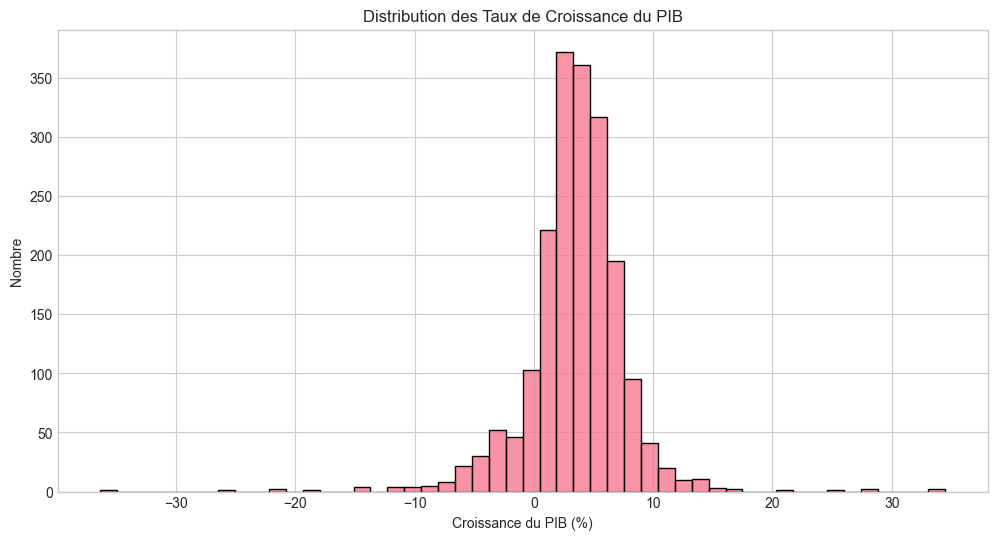

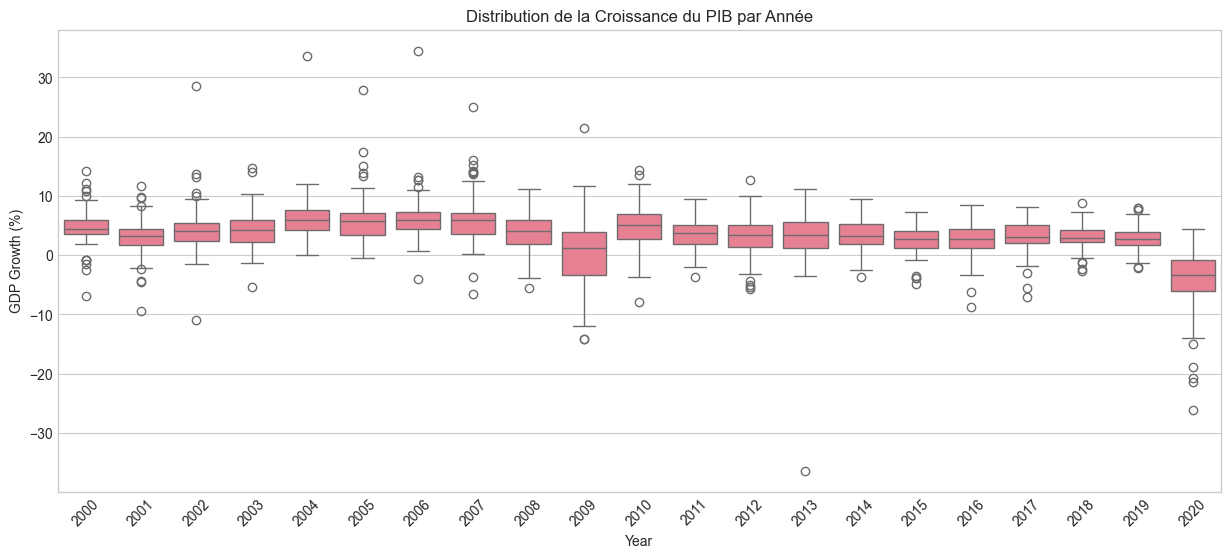

In [6]:
# Distribution des taux de croissance
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='GDP Growth (%)', bins=50)
plt.title('Distribution des Taux de Croissance du PIB')
plt.xlabel('Croissance du PIB (%)')
plt.ylabel('Nombre')
plt.show()

# Boîte à moustaches par année
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Year', y='GDP Growth (%)')
plt.title('Distribution de la Croissance du PIB par Année')
plt.xticks(rotation=45)
plt.show()

## Analyse des Valeurs Actuelles du PIB

Analysons maintenant la distribution et l'évolution des valeurs du PIB en utilisant une échelle logarithmique pour une meilleure visualisation.

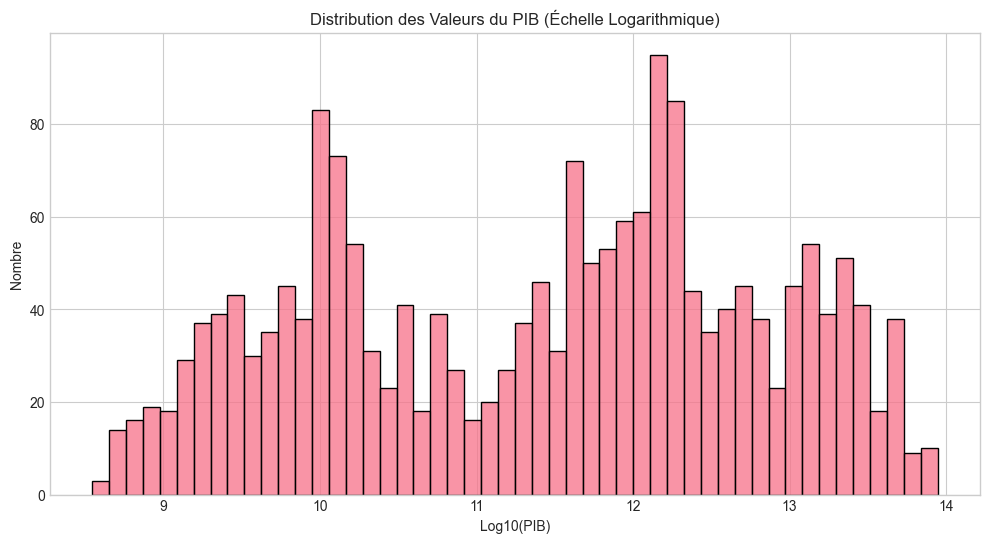

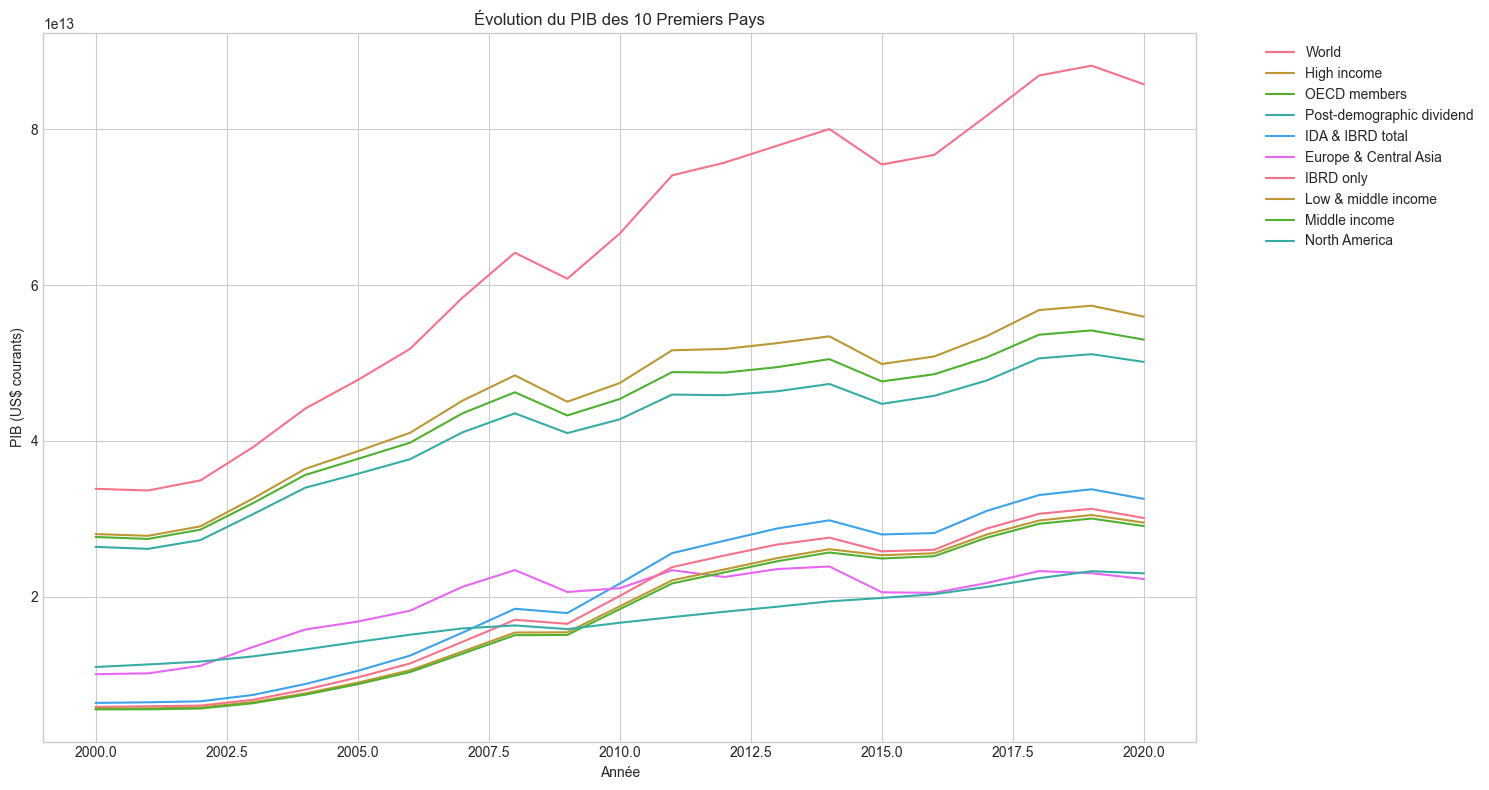

In [7]:
# Création d'une échelle logarithmique du PIB
df['Log PIB'] = np.log10(df['GDP (Current US$)'])

# Distribution des valeurs du PIB (échelle log)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Log PIB', bins=50)
plt.title('Distribution des Valeurs du PIB (Échelle Logarithmique)')
plt.xlabel('Log10(PIB)')
plt.ylabel('Nombre')
plt.show()

# Tendance du PIB pour les 10 premiers pays
top_10_countries = top_10_gdp.index.tolist()
plt.figure(figsize=(15, 8))
for country in top_10_countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP (Current US$)'], label=country)
plt.title('Évolution du PIB des 10 Premiers Pays')
plt.xlabel('Année')
plt.ylabel('PIB (US$ courants)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()